{0: 'manhole', 1: 'pothole', 2: 'sewer', 3: 'vehicle'}

0: 384x640 1 pothole, 1 vehicle, 41.0ms
Speed: 1.0ms preprocess, 41.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
📌 pothole 탐지된 개수: 1
탐지된 pothole 1:
  ▶ 중심 좌표: (1546.20, 782.49)
  ▶ 너비: 267.80, 높이: 167.39
  ▶ 신뢰도: 0.72


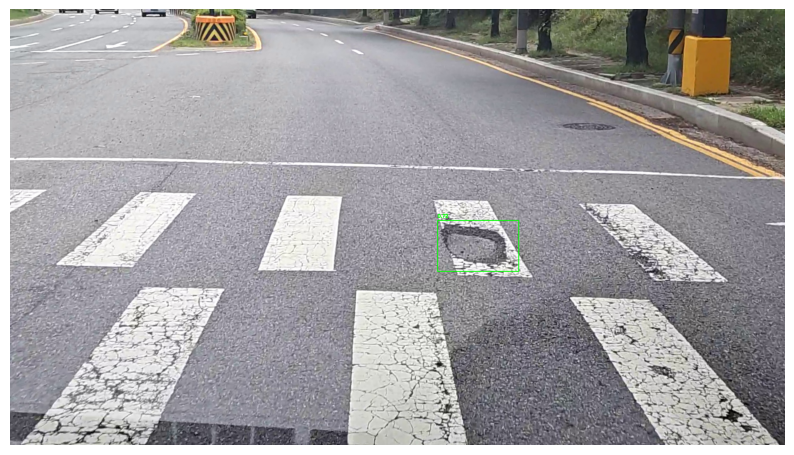

In [26]:
import torch
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# 1️⃣ YOLOv11 모델 로드
model = YOLO("best_yolo11n_241107.pt")  # 또는 "yolo11m.pt", "yolo11l.pt"

print(model.names)  # 클래스 목록 출력

# 2️⃣ 이미지 로드 및 대비 조정
image_path = "road.png"  
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 대비 향상 (히스토그램 평활화)
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_eq = cv2.equalizeHist(image_gray)
image_rgb = cv2.cvtColor(image_eq, cv2.COLOR_GRAY2RGB)

# 3️⃣ YOLO 모델 실행 (신뢰도 및 IOU 조정)
results = model(image_rgb, conf=0.5, iou=0.3)  # 신뢰도 & IOU 조정

# 4️⃣ 탐지 결과 필터링 (클래스 ID가 1인 객체만)
detections = results[0].boxes

# pothole만 필터링
potholes = [box for box in detections if int(box.cls[0].cpu().numpy()) == 1]

print(f"📌 pothole 탐지된 개수: {len(potholes)}")

for i, box in enumerate(potholes):
    x_center, y_center, w, h = box.xywh[0].cpu().numpy()  
    confidence = box.conf[0].cpu().numpy()  
    class_id = int(box.cls[0].cpu().numpy())  

    print(f"탐지된 pothole {i+1}:")
    print(f"  ▶ 중심 좌표: ({x_center:.2f}, {y_center:.2f})")
    print(f"  ▶ 너비: {w:.2f}, 높이: {h:.2f}")
    print(f"  ▶ 신뢰도: {confidence:.2f}")

# 5️⃣ pothole만 시각화
for box in potholes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
    confidence = box.conf[0].cpu().numpy()
    
    # 바운딩 박스 그리기
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, f"{confidence:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 6️⃣ 결과 이미지 표시
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis("off")
plt.show()


In [28]:
import torch
from ultralytics import YOLO

# 1️⃣ YOLOv11 모델 로드
model = YOLO("best_yolo11n_241107.pt")  # 훈련된 모델 로드

# 2️⃣ 더미 입력 데이터 생성 (NCNN이 지원하는 표준 입력 크기)
dummy_input = torch.randn(1, 3, 640, 640)

# 3️⃣ 모델을 ONNX로 변환
onnx_model_path = "best_yolo11n_241107.onnx"
model.export(format="onnx", imgsz=640, dynamic=False, simplify=True, opset=12)

print(f"✅ ONNX 모델 변환 완료: {onnx_model_path}")


Ultralytics 8.3.27  Python-3.8.20 torch-2.4.1+cpu CPU (12th Gen Intel Core(TM) i7-12700)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'best_yolo11n_241107.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.3 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ---------------------------------------- 11.1/11.1 MB 10.2 MB/s eta 0:00:00

requirements: AutoUpdate success  4.5s, installed 2 packages: ['onnxslim', 'onnxruntime']
requirements:  Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 12...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success  5.5s, saved as 'best_yolo11n_241107.onnx' (10.1 MB)

Export complete (5.7s)
Results saved to C:\Users\Administrator\Desktop\\vscode_AI
Predict:         yolo predict task=detect model=best_yolo11n_241107.onnx imgsz=640  
Validate:       

In [1]:
from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO("best_yolo11n_241107.pt")

# Export the model to NCNN format
model.export(format="ncnn")  # creates '/yolo11n_ncnn_model'

Ultralytics 8.3.70  Python-3.8.20 torch-2.4.1+cpu CPU (12th Gen Intel Core(TM) i7-12700)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'best_yolo11n_241107.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.3 MB)

TorchScript: starting export with torch 2.4.1+cpu...
TorchScript: export success  1.3s, saved as 'best_yolo11n_241107.torchscript' (10.4 MB)
requirements: Ultralytics requirement ['ncnn'] not found, attempting AutoUpdate...
   ---------------------------------------- 4.0/4.0 MB 7.4 MB/s eta 0:00:001

requirements: AutoUpdate success  2.9s, installed 1 package: ['ncnn']
requirements:  Restart runtime or rerun command for updates to take effect


NCNN: starting export with NCNN 1.0.20241226...
NCNN: WARNING  PNNX not found. Attempting to download binary file from https://github.com/pnnx/pnnx/.
Note PNNX Binary file must be placed in current working directory or in C:\ProgramData\anaconda3\e

100%|██████████| 16.0M/16.0M [00:01<00:00, 9.51MB/s]
Unzipping pnnx-20241223-windows.zip to C:\Users\Administrator\Desktop\창고\vscode_AI\pnnx-20241223-windows...: 100%|██████████| 3/3 [00:00<00:00, 17.44file/s]

NCNN: running 'C:\ProgramData\anaconda3\envs\LLM\Lib\site-packages\ultralytics\pnnx.exe best_yolo11n_241107.torchscript ncnnparam=best_yolo11n_241107_ncnn_model\model.ncnn.param ncnnbin=best_yolo11n_241107_ncnn_model\model.ncnn.bin ncnnpy=best_yolo11n_241107_ncnn_model\model_ncnn.py pnnxparam=best_yolo11n_241107_ncnn_model\model.pnnx.param pnnxbin=best_yolo11n_241107_ncnn_model\model.pnnx.bin pnnxpy=best_yolo11n_241107_ncnn_model\model_pnnx.py pnnxonnx=best_yolo11n_241107_ncnn_model\model.pnnx.onnx fp16=0 device=cpu inputshape="[1, 3, 640, 640]"'


NCNN: export success  9.2s, saved as 'best_yolo11n_241107_ncnn_model' (10.0 MB)

Export complete (10.7s)
Results saved to C:\Users\Administrator\Desktop\\vscode_AI
Predict:         yolo predict task=detect model=best_yolo11n_241107_ncnn_model imgsz=640  
Validate:        yolo val task=detect model=best_yolo11n_241107_ncnn_model imgsz=640 data=E:\Share\YOLO_241104\data.yaml  
Visualize:       https://netron.app


'best_yolo11n_241107_ncnn_model'